In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset

# Model and dataset configuration
model_name = "EleutherAI/pythia-70m"
dataset_path = "lamini/taylor_swift"

# Load the dataset
dataset = load_dataset(dataset_path)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Function to preprocess the dataset
def preprocess_function(examples):
    # Combine question and answer
    full_text = [q + " " + a for q, a in zip(examples["question"], examples["answer"])]
    
    # Tokenize the text
    tokenized = tokenizer(full_text, padding="max_length", truncation=True, max_length=512)
    
    # Set labels to be the same as input_ids for language modeling
    tokenized["labels"] = tokenized["input_ids"].copy()
    
    return tokenized

# Preprocess the dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True, remove_columns=dataset["train"].column_names)

# Split the dataset
train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['test'].shuffle(seed=42).select(range(87))  # Use a subset of test data for evaluation

# Load the pre-trained model
model = AutoModelForCausalLM.from_pretrained(model_name)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=1000,
    load_best_model_at_end=True,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

# Start training
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")

print("Training complete. Model saved in './fine_tuned_model'.")

c:\Users\kanis\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/588 [00:00<?, ?it/s]

{'loss': 7.6377, 'grad_norm': 416.21380615234375, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.05}
{'loss': 5.9945, 'grad_norm': 430.6407775878906, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.1}
{'loss': 2.7714, 'grad_norm': 274.91497802734375, 'learning_rate': 3e-06, 'epoch': 0.15}
{'loss': 0.471, 'grad_norm': 7.105105400085449, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.2}
{'loss': 0.3768, 'grad_norm': 5.304256916046143, 'learning_rate': 5e-06, 'epoch': 0.26}
{'loss': 0.3261, 'grad_norm': 5.202910900115967, 'learning_rate': 6e-06, 'epoch': 0.31}
{'loss': 0.27, 'grad_norm': 4.831878662109375, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.36}
{'loss': 0.3162, 'grad_norm': 10.729480743408203, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.41}
{'loss': 0.3664, 'grad_norm': 6.647458076477051, 'learning_rate': 9e-06, 'epoch': 0.46}
{'loss': 0.3533, 'grad_norm': 7.576627254486084, 'learning_rate': 1e-05, 'epoch': 0.51}
{'loss': 0.2835, 'grad_norm': 3.48807096

  0%|          | 0/22 [00:00<?, ?it/s]

{'eval_loss': 0.3316224217414856, 'eval_runtime': 23.1445, 'eval_samples_per_second': 3.759, 'eval_steps_per_second': 0.951, 'epoch': 2.55}
{'loss': 0.1953, 'grad_norm': 3.0571868419647217, 'learning_rate': 4.431818181818182e-05, 'epoch': 2.6}
{'loss': 0.286, 'grad_norm': 7.948612213134766, 'learning_rate': 3.8636363636363636e-05, 'epoch': 2.65}
{'loss': 0.1496, 'grad_norm': 5.921652793884277, 'learning_rate': 3.295454545454545e-05, 'epoch': 2.7}
{'loss': 0.2144, 'grad_norm': 5.6841654777526855, 'learning_rate': 2.7272727272727273e-05, 'epoch': 2.76}
{'loss': 0.2265, 'grad_norm': 5.35058069229126, 'learning_rate': 2.1590909090909093e-05, 'epoch': 2.81}
{'loss': 0.2093, 'grad_norm': 4.62241268157959, 'learning_rate': 1.590909090909091e-05, 'epoch': 2.86}
{'loss': 0.1821, 'grad_norm': 3.7548704147338867, 'learning_rate': 1.0227272727272729e-05, 'epoch': 2.91}
{'loss': 0.1385, 'grad_norm': 3.1675217151641846, 'learning_rate': 4.5454545454545455e-06, 'epoch': 2.96}
{'train_runtime': 1590.3

  0%|          | 0/22 [00:00<?, ?it/s]

{'eval_loss': 0.29042214155197144, 'eval_runtime': 23.8905, 'eval_samples_per_second': 3.642, 'eval_steps_per_second': 0.921, 'epoch': 3.0}
Training complete. Model saved in './fine_tuned_model'.


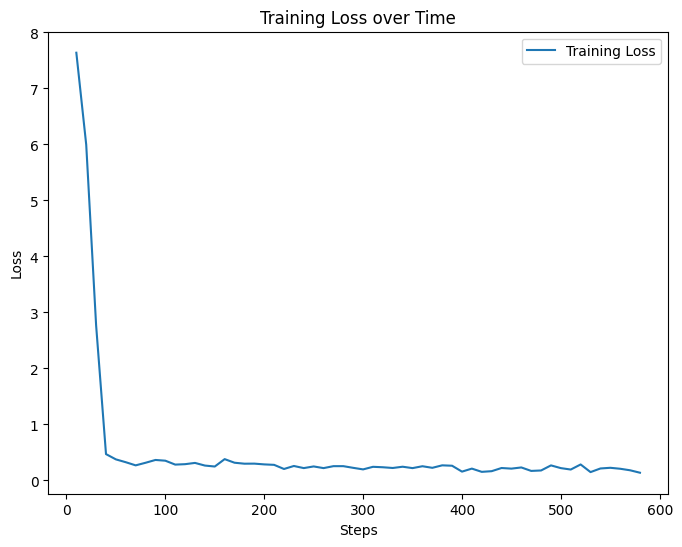

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Generated Text:  The sky is blue because the sky is brown. This image shows the sky with the red lights on.


In [7]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Plot the training loss graph
def plot_loss(log_history):
    steps = []
    losses = []

    for log in log_history:
        if "loss" in log:
            steps.append(log["step"])
            losses.append(log["loss"])

    plt.figure(figsize=(8, 6))
    plt.plot(steps, losses, label="Training Loss")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Loss over Time")
    plt.legend()
    plt.show()

# Call this after training
plot_loss(trainer.state.log_history)

# Now, let's test the model with a custom prompt
def test_model(model, tokenizer, prompt, max_length=50):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to("cuda" if torch.cuda.is_available() else "cpu")

    # Generate text
    output = model.generate(**inputs, max_length=max_length, num_return_sequences=1, do_sample=True, top_p=0.95, temperature=0.9)

    # Decode and print the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Generated Text: ", generated_text)

# Example of testing the model
prompt = "The sky is blue because"
test_model(model, tokenizer, prompt)


In [10]:
prompt = "when was Taylor Swift born"
test_model(model, tokenizer, prompt)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Generated Text:  when was Taylor Swift born? Taylor Swift was born on December 29, 1989.
